<h1 style="text-align:center;">Loop Functions : lappy, sapply, apply, tapply & mapply</h1>


<u>**Author</u> :** [Younes Dahami](https://www.linkedin.com/in/dahami/)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
    
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of contents</h3>
    
<font color="blue" size=+1><b>[0. Introduction](#0)</b></font>
    
<font color="blue" size=+1><b>[1. `lapply` function](#1)</b></font>
    
<font color="blue" size=+1><b>[2. `sapply` function](#2)</b></font>
    
<font color="blue" size=+1><b>[3. `apply` function](#3)</b></font>
    
<font color="blue" size=+1><b>[4. `mapply` function](#4)</b></font>
    
<font color="blue" size=+1><b>[5. `tapply` function](#5)</b></font>
    
<font color="blue" size=+1><b>[6. `split` function](#6)</b></font>


<a id="0"></a>
# Introduction

Writing **`for`**, **`while`** loops is useful when programming but not particularly easy when working interactively on the commabd line. There are some functions which implement looping to make life easier :

* **`lapply`** **:** loops over a **list** and evaluate a function on each element, ("l" stands for list).
* **`sapply`** **:** same as `lapply` but try to simplify the results ("s" stands for simplify).
* **`apply`** **:** apply a function over the margins of an array.
* **`tapply`** **:** apply a function over subsets of a vector ("t" stands for table)
* **`mapply`** **:** multivariate version of lapply ("m" stands for multivariate)
* **`split()`** **:** (not a loop function) an auxilliary function that is also useful, particularly in conjuction with `lapply`.


In [1]:
x <- sample(letters, 100, rep=T)
table(x)
tapply(x, x, length)

x
a b c d e f g h i j k l n o p q r s t u v w x y z 
3 5 5 8 5 6 5 5 2 3 4 9 5 6 2 2 2 3 4 4 1 4 2 3 2 

a b c d e f g h i j k l n o p q r s t u v w x y z 
3 5 5 8 5 6 5 5 2 3 4 9 5 6 2 2 2 3 4 4 1 4 2 3 2

<a id="1"></a>

# 1) `lapply` function

The **`lapply()`** functions takes 3 arguments :

* 1) a list `x`
* 2) a function (or the name of a function) `FUN`
* 3) other arguments via its `...` argument

In [2]:
?lapply

**NOTE :** If x is not a list, it will be coerced to a list using `as.list()`. `lapply` always returns a list, regardless of the class of the input.

In [3]:
# Creating a list
x <- list(a=1:5, b=rnorm(10))
x

$a
[1] 1 2 3 4 5

$b
 [1]  0.5978154 -0.8346394  0.1377430 -0.1867550  1.3162943 -2.0089508
 [7]  1.5234003 -0.3166075 -0.2047078  0.2363853

In [4]:
# lapply will loop over the elements of the list 'x' and apply the 'mean' function
lapply(x, mean)

$a
[1] 3

$b
[1] 0.02599778

In [5]:
# rnorm(nb of simulations, mean)
(x <- list(a=1:4, b=rnorm(10), c=rnorm(20,1), d=rnorm(100,5)))

$a
[1] 1 2 3 4

$b
 [1] -1.21156444  0.08134879 -0.74990879  0.59596003  0.32923612 -0.80148517
 [7]  0.12517922 -0.62504308  0.41534476  1.31178156

$c
 [1]  1.17908644  0.95607888  0.46235410  0.28583614  1.71564116  0.59043577
 [7]  0.98985302  2.08270501  1.85149022  0.69346362  1.30375479 -1.95222640
[13]  1.04974166  1.28173706  0.76138510  1.58413927  1.40864132  2.27912955
[19] -0.09797088  1.53138490

$d
  [1] 4.809083 5.327276 5.109087 5.343491 3.252658 4.118756 6.245214 4.270372
  [9] 3.931513 4.733835 6.159882 4.595239 4.738609 5.344462 4.947129 4.832472
 [17] 4.729641 6.334059 3.970658 4.577242 3.895086 5.195664 6.427881 4.735489
 [25] 3.887100 4.916791 3.931124 4.231978 6.449827 4.998045 4.734486 7.671960
 [33] 4.358161 5.154200 5.294972 6.920467 4.748802 3.636143 4.940073 3.984013
 [41] 4.209445 6.322644 5.744032 4.825969 4.184633 5.461289 4.624100 5.474610
 [49] 6.095789 4.001080 4.451599 4.328192 4.760330 4.175397 5.096658 5.276800
 [57] 4.677262 5.443582 4.065328 6.142556 4.606154 6.074770 5.642549 4.894507
 [65] 4.880523 4.722328 6.686338 4.438497 1.537845 3.586194 6.558086 6.168125
 [73] 3.510440 4.405872 4.973006 4.985582 4.814889 3.555779 6.823095 4.292312
 [81] 4.740598 3.532881 5.017152 5.221920 4.669724 5.794548 4.648311 5.448027
 [89] 5.138345 4.478531 6.513987 5.788595 6.084297 5.163580 5.183633 4.385193
 [97] 4.602660 5.639861 5.556394 5.479975

In [6]:
lapply(x, mean)

$a
[1] 2.5

$b
[1] -0.0529151

$c
[1] 0.997833

$d
[1] 4.970893

In [7]:
# 'lapply' will loop over the elements of 'x' & generate random outcomes from the uniform distribution
x <- 1:4
lapply(x, runif)

[[1]]
[1] 0.8792615

[[2]]
[1] 0.8722744 0.5210532

[[3]]
[1] 0.6018146 0.8615990 0.7715502

[[4]]
[1] 0.2912083 0.9248775 0.2041146 0.2759579

**NOTE :** `lapply` and friends make heavy use of the anonymous functions.

* <u>**Anonymous functions**</u> **:** functions that don't have names

In [8]:
(x <- list(a = matrix(1:4,2,2), b=matrix(1:6,3,2)))

1,3
2,4
1,4
2,5
3,6


Suppose we want to extract the first column from each one of these matrixes, there is no function that already extracts first column of a matrix, but this is easy to do, we can just write a function that takes the first column of a matrix :

In [9]:
# extracting the first column of each matrix in the list 'x'
lapply(x, function (elt) elt[,1])

$a
[1] 1 2

$b
[1] 1 2 3

In [10]:
# extracting the first row of each matrix in the list 'x'
lapply(x, function (elt) elt[1,])

$a
[1] 1 3

$b
[1] 1 4

<a id="2"></a>

# 2) `sapply` function

**`sapply()`** will try to simplify the result of the `lapply` if possible :

* If the result is a **list** where every element is of length 1, then a **vector** is returned.
* If the result is a list where every element is a vector of the same length $(>1)$, a **matrix** is returned.
* If it can't figure things out, a list is returned.

In [11]:
# Creating a list
x <- list(a=1:5, b=rnorm(10))
# sapply will loop over the elements of the list 'x' and apply the 'mean' function, and return a vector
sapply(x, mean)

a         b 
3.0000000 0.5438225

In [12]:
# Creating a list of matrices having the same number of columns (2)
x <- list(a = matrix(1:4,2,2), b=matrix(1:6,3,2))
# extracting the first row of each matrix in the list 'x', sapply will return a matrix
sapply(x, function (elt) elt[1,])

a,b
1,1
3,4


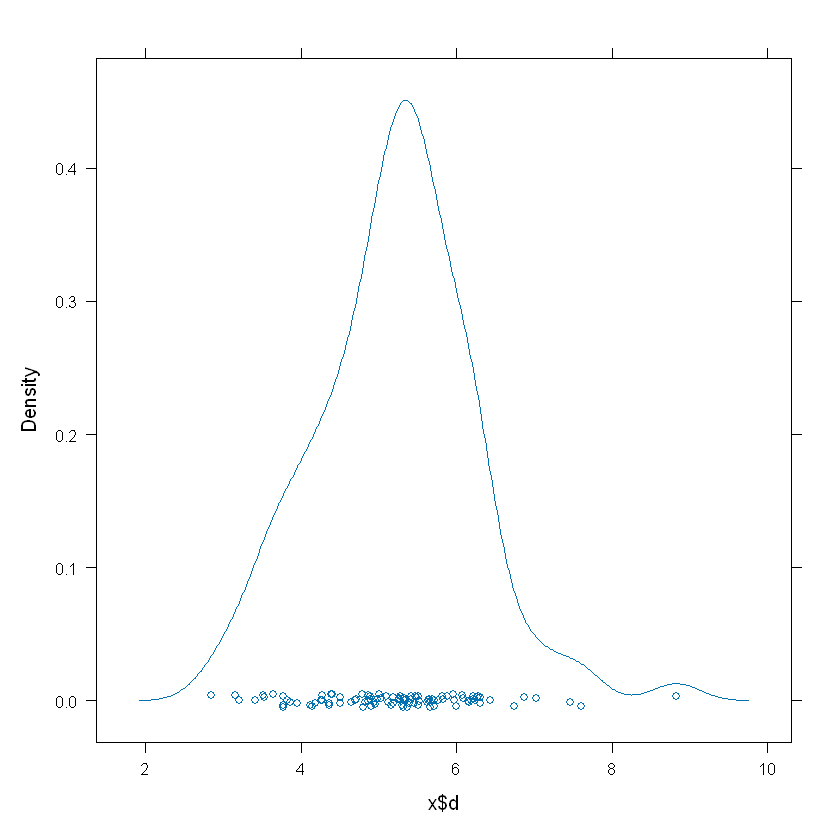

In [13]:
library(lattice)

x <- list(a=1:4, b=rnorm(10), c=rnorm(20,1), d=rnorm(100,5))
densityplot(x$d)

In [14]:
sapply(x, mean)

a         b         c         d 
2.5000000 0.2082882 0.7146688 5.2111193

<a id="3"></a>

# 3) `apply` function

**`apply()`** is used to evaluate a function (often an anonymous one) over the margins of an array :

* It is most often used to apply a function to the rows or columns of a matrix.
* It can be used with general arrays, e.g. taking the average of an array of matrices.
* It is not really faster than writing a loop (e.g a `for` loop), but it works in one line!


In [15]:
str(apply)

function (X, MARGIN, FUN, ..., simplify = TRUE)  


* `X` is an array
* `MARGIN` is an integer vector indicating which margins should be "retained"
* `FUN` is a function to be applied
* `...` is for other arguments to be passed to `FUN`

**Example :** Here's a matrix that we're creating, it has 20 rows and 10 columns :

In [16]:
x <- matrix(rnorm(200), 20, 10)

# calculating the sum on each column
apply(x, 2, sum)

# calculating the mean on each row 
apply(x, 1, mean)

[1] -0.3124961  1.0271803 -3.0831407  4.2983732  3.2812788 -0.9207913
 [7]  2.9641350  7.5586885 -5.0071753  0.7707570

[1]  0.08598069  0.36026923  0.26988821 -0.14479217  0.24042308  0.51388518
 [7]  0.35486861  0.01743107 -0.41608860 -0.05528811 -0.27728335  0.36246665
[13]  0.43990491  0.08209550  0.35575800 -0.32326767  0.02944087 -0.17119334
[19] -0.48269985 -0.18411798

### <u>Column/Row sums and means</u>

For sums and means of matrix dimensions, we have some shortcuts :

* **`rowSums(x)` = apply(x,1, sum)**
* **`colSums(x)` = apply(x,2, sum)**
* **`rowMeans(x)` = apply(x,1, mean)**
* **`colMeans(x)` = apply(x,2, mean)**

In [17]:
any(colMeans(x) == apply(x, 2, mean))

[1] TRUE

The shortcut functions are **much faster,** but we won't notice unless we're using a large matrix :

In [18]:
# 'quantile' function has a 'probs' argument
?quantile

In [19]:
# How to use the additional 'probs' argument in apply
x <- matrix(rnorm(200), 20,10)
apply(x, 1, quantile, probs = c(0.25,0.75))

25%,-1.2359726,-0.8854632,-0.6192239,-0.3956646,-0.4700383,0.1156613,-0.4547638,-0.8620251,-0.5852237,0.205136,-1.0243946,-0.9788321,-1.0994339,-0.7485477,-0.9538425,-0.5533967,-0.79818535,-0.2526833,0.2243951,-0.3004480
75%,0.8586243,0.4145199,0.7022165,0.6979335,1.2252413,0.6081858,0.9809280,1.1784019,0.6810452,1.086350,0.2367041,1.1212064,0.9204977,1.6393754,0.4086426,1.0486938,-0.03244638,0.6109058,0.5425038,0.9604246


This function goes through each row of the matrix x, and for each row it calculates the $25$ and $75$ percentile, so for each row there's going to be 2 numbers that are returned, so `apply` will create a matrix that has 2 rows and the number of columns is equal to the number of rows in this matrix (20 in this example).

### <u>Average matrix in an array</u>

In [20]:
# Creating a 2x2x10 array
(a <- array(rnorm(2*2*10), c(2,2,10)))
class(a <- array(rnorm(2*2*10), c(2,2,10)))
dim(a <- array(rnorm(2*2*10), c(2,2,10)))

, , 1

           [,1]      [,2]
[1,] -0.1911598 0.4432494
[2,] -0.1763507 1.3082305

, , 2

           [,1]       [,2]
[1,] -0.7257042  0.3166868
[2,]  0.5402593 -0.6511022

, , 3

           [,1]       [,2]
[1,]  1.1658917 0.04417053
[2,] -0.7175275 1.41589753

, , 4

          [,1]       [,2]
[1,] 0.1049381 -0.1379441
[2,] 1.0590721 -1.3815355

, , 5

          [,1]       [,2]
[1,] 0.5937691  1.4419755
[2,] 1.7001857 -0.5627691

, , 6

           [,1]      [,2]
[1,]  0.6743876 -0.577613
[2,] -0.4209817  1.382420

, , 7

            [,1]       [,2]
[1,] -0.01547253 -0.7609945
[2,]  0.49837668 -0.7519761

, , 8

           [,1]       [,2]
[1,] -0.3296073 -1.8500774
[2,]  0.5222918  0.6961067

, , 9

            [,1]      [,2]
[1,]  0.14111894 0.3557833
[2,] -0.08156143 0.7499749

, , 10

           [,1]       [,2]
[1,] -0.6451771  0.1016082
[2,]  0.9127526 -0.8401623

[1] "array"

[1]  2  2 10

In [21]:
# calculating the average in each 2x2 array in 'a' :
apply(a, c(1,2), mean)  # 1 for the 1st dimension, 2 for the 2nd dimension

-0.2342665,0.1954321
0.2159171,-0.5403927


We can think of this as they're being a bunch of $2\times 2$ matrices stacked together, and the idea is we want to take the average of those $2\times 2$ matrices :

<center>
    <div>
        <img src="fig1.jpg" width="500"/>
    </div>
</center>


So the average of the $2\times 2$ matrix is going to another $2\times 2$ matrix which is the mean. this also equivalent to :

In [22]:
rowMeans(a, dim = 2)

-0.2342665,0.1954321
0.2159171,-0.5403927


<a id="4"></a>

# 4) `mapply` function

**`mapply()`** is a loop function, it's a multivariate version of `lapply` and `sapply`, and the idea is it **applies a function in parrallel over a set of arguments.**

One thing we may have noticed is `lapply`, `sapply`, `tapply` (later) is that **they only apply a function over the elements of a single object.**

In [23]:
str(mapply)

function (FUN, ..., MoreArgs = NULL, SIMPLIFY = TRUE, USE.NAMES = TRUE)  


* `FUN` is a function to be applied
* `...` contains arguments to apply over
* `MoreArgs` is a list of other arguments to `FUN`
* `SIMPLIFY` indicates whether the result should be simplified

* **Example :** instead of writing :

In [24]:
list(rep(1,4), rep(2,3), rep(3,2), rep(4,1))

[[1]]
[1] 1 1 1 1

[[2]]
[1] 2 2 2

[[3]]
[1] 3 3

[[4]]
[1] 4

We write :

In [25]:
mapply(rep, 1:4, 4:1)

[[1]]
[1] 1 1 1 1

[[2]]
[1] 2 2 2

[[3]]
[1] 3 3

[[4]]
[1] 4

In [26]:
noise <- function(n, mean, sd){
    rnorm(n, mean, sd)
}

noise(5,1,2)

[1]  2.136429  3.290318  1.838616 -1.173345  0.474855

But this function doesn't work correctly if we passed a vector of arguments.

In [27]:
noise(1:5, 1:5, 2)

[1] -0.2120406  3.4486106  6.3821784  2.5288004  2.0770611

But what we really want to happen is to have :

In [28]:
list(noise(1,1,2), noise(2,2,2), noise(3,3,2), noise(4,4,2), noise(5,5,2))

[[1]]
[1] 1.164747

[[2]]
[1] 1.236907 4.174847

[[3]]
[1] -0.8284513  4.1396184  2.6472646

[[4]]
[1] 5.208987 7.168068 3.062520 4.090706

[[5]]
[1] 4.383753 3.036732 5.494559 6.561984 4.020610

So using `mapply` :

In [29]:
mapply(noise, 1:5, 1:5, 2)

[[1]]
[1] 3.585093

[[2]]
[1]  0.7682178 -0.1968314

[[3]]
[1] 1.1315787 3.0429474 0.5136033

[[4]]
[1] 4.954608 4.783873 6.972545 4.598736

[[5]]
[1] 7.787514 5.520274 5.804380 6.962271 5.549863

<a id="5"></a>

# 5) `tapply` function

**`tapply()`** is used to apply a function over subsets of a vector. So the idea is : let's imagine we have a vector, a numeric vector, and there are pieces of this vector that we want to calculate the summary statistic over, we're going to have another variable or another object which identifies which element of this, of our numeric vector belongs to which group.

**Example :**

In [30]:
# 10 nbs from standard distribution N(0,1), 10 from uniform distribution, 10 from N(1,1)
(x <- c(rnorm(10), runif(10), rnorm(10,1)))

[1]  1.71054074  0.96702975 -1.63998284  0.24178675 -0.83403019  0.40523593
 [7]  0.09386995  0.59638472 -1.07227908  0.83606849  0.93136883  0.24877180
[13]  0.16213609  0.58471445  0.48686201  0.11748586  0.27943600  0.91148280
[19]  0.72753055  0.47767410  2.21446568  1.52437888 -1.12616518  1.58208930
[25]  1.84536529  1.23568940  0.10192621  2.25746532 -0.80222934  2.37934007

In [31]:
?gl

In [32]:
# generating a factor : 3 levels, each level is repeated 10 times
f <- gl(3,10)
f

[1] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
Levels: 1 2 3

In [33]:
# taking group means
tapply(x, f, mean)

1         2         3 
0.1304624 0.4927462 1.1212326

In [34]:
# taking group means without simplification
tapply(x, f, mean, simplify = FALSE)

$`1`
[1] 0.1304624

$`2`
[1] 0.4927462

$`3`
[1] 1.121233

a list of 3 elements is returned, each element is the mean of a subgroup.

In [35]:
# find group ranges
tapply(x, f, range)

$`1`
[1] -1.639983  1.710541

$`2`
[1] 0.1174859 0.9313688

$`3`
[1] -1.126165  2.379340

The `min` and `max` of the observations within that subset of the vector x is returned, for example the min and max of the first group :

In [36]:
min(x[1:10])
max(x[1:10])

[1] -1.639983

[1] 1.710541

<a id="6"></a>

# 6) `split` function

`tapply` is useful because it splits up^a vector into little pieces and it applies a summary statistic or a function to those little pieces, and then after it applies a function it brings the peces back together again.

**`split()` is not a loop function,** but it's a very handy function that can be used in conjuction with functions like `lapply` or `sapply`.

`split()` takes a vector (kind of like `tapply` without applying the summary statistic) or objects and splits it into groups determined by a factor or list of factors.

In [37]:
str(split)

function (x, f, drop = FALSE, ...)  


* `x` is a vector (or list) or dataframe
* `f` is a factor (or coerced to one) or a list of factors
* `drop` indicates whether empty factors levels should be dropped


**Example :**

In [38]:
(x <- c(rnorm(10), runif(10), rnorm(10,1)))

[1]  1.15975688  0.54254841  0.32139234 -0.58650096 -0.20303342 -0.42110098
 [7]  1.18468594 -1.08788816  0.57641245  0.86366154  0.29964365  0.15315650
[13]  0.56459679  0.99055704  0.77719779  0.85865260  0.15068618  0.08499097
[19]  0.28900955  0.30755104  1.26418126  0.19621749 -0.30260877  0.38362492
[25] -0.09659526  1.03168275  1.97759218  1.33722869  2.06318487  2.57068398

In [39]:
# generating a factor : 3 levels, each level is repeated 10 times
f <- gl(3,10)
f

[1] 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
Levels: 1 2 3

In [40]:
# splitting x using the factor 'f'
split(x, f)

$`1`
 [1]  1.1597569  0.5425484  0.3213923 -0.5865010 -0.2030334 -0.4211010
 [7]  1.1846859 -1.0878882  0.5764125  0.8636615

$`2`
 [1] 0.29964365 0.15315650 0.56459679 0.99055704 0.77719779 0.85865260
 [7] 0.15068618 0.08499097 0.28900955 0.30755104

$`3`
 [1]  1.26418126  0.19621749 -0.30260877  0.38362492 -0.09659526  1.03168275
 [7]  1.97759218  1.33722869  2.06318487  2.57068398

So now we can see when we split the x vector, we got a list back and the first element is 10 normals, the second 10 uniforms, and the third is 10 normals. 

In [41]:
# Calculating the mean of each level : the 'split+ lapply' here is equivalent to 'tapply'
lapply(split(x,f), mean)

$`1`
[1] 0.2349934

$`2`
[1] 0.4476042

$`3`
[1] 1.042519

In [42]:
tapply(x, f, mean)

1         2         3 
0.2349934 0.4476042 1.0425192

### <u>Spltting a dataframe</u>

But the nice thing about the `split` function is that it can be used to split much more complicated types of objects.

**Example :**



In [43]:
library(datasets)
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


One thing we might want to do is calculate, for example, the mean of `Ozone`, solar radiation `Solar.R`, `Wind`, and the temperature `Temp` within each month. Well, we'd like to split the dataframe into **monthly pieces,** and calculate the means, the columns means using either `apply` or `colMeans` on those other variables.

In [44]:
# Splitting the dataframe by 'Month'
(s <- split(airquality, airquality$Month))

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6
7,23,299,8.6,65,5,7
8,19,99,13.8,59,5,8
9,8,19,20.1,61,5,9


In [45]:
lapply(s, function(x) colMeans(x[, c("Ozone", "Solar.R", "Wind")]))

$`5`
   Ozone  Solar.R     Wind 
      NA       NA 11.62258 

$`6`
    Ozone   Solar.R      Wind 
       NA 190.16667  10.26667 

$`7`
     Ozone    Solar.R       Wind 
        NA 216.483871   8.941935 

$`8`
   Ozone  Solar.R     Wind 
      NA       NA 8.793548 

$`9`
   Ozone  Solar.R     Wind 
      NA 167.4333  10.1800

Let's simplify the output using `sapply`, and remove the NAs :

In [46]:
sapply(s, function(x) colMeans(x[, c("Ozone", "Solar.R", "Wind")], na.rm = TRUE))

,5,6,7,8,9
Ozone,23.61538,29.44444,59.115385,59.961538,31.44828
Solar.R,181.29630,190.16667,216.483871,171.857143,167.43333
Wind,11.62258,10.26667,8.941935,8.793548,10.18000


**NOTE : Splitting on more than one level**

In the past couple of examples, we had only a single factor variable, and we've split whatever the object is with a vector or a dataframe according to the levels of that single factor, but we might have **more than one factor.** For example, we might have a variable that is "Gender" ("Male" and "Female") and we might have another variable that has for example the "Race" so we might want to look at the **combination of the levels withing those factors.**

In [47]:
# Example dataframe
df <- data.frame(
  Gender = c("Male", "Male", "Female", "Female", "Male", "Female"),
  Race = c("White", "Black", "White", "Black", "White", "Black"),
  Age = c(25, 30, 35, 40, 45, 50)
)

# Splitting by 'Gender' and 'Race', and calculating mean 'Age' for each combination
(split_groups <- split(df, list(df$Gender, df$Race)))

print("--------------------------------------------------------")

# Using 'lapply' to calculate mean 'Age' for each split group
mean_age_lapply <- lapply(split_groups, function(x) mean(x$Age))

# Using 'sapply' to calculate mean 'Age' for each split group
mean_age_sapply <- sapply(split_groups, function(x) mean(x$Age))

# Output
mean_age_lapply
mean_age_sapply


,Gender,Race,Age
,<chr>,<chr>,<dbl>
4,Female,Black,40
6,Female,Black,50
,Gender,Race,Age
,<chr>,<chr>,<dbl>
2,Male,Black,30
,Gender,Race,Age
,<chr>,<chr>,<dbl>
3,Female,White,35
,Gender,Race,Age


[1] "--------------------------------------------------------"


$Female.Black
[1] 45

$Male.Black
[1] 30

$Female.White
[1] 35

$Male.White
[1] 35

Female.Black   Male.Black Female.White   Male.White 
          45           30           35           35

# Log Change 

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description |
| ----------------- | ------- | -------------   | ----------------------- |
| 2023-11-24       | 1.0     | Younes Dahami   |   initial version |
| 2024-05-13       | 1.1     | Younes Dahami   |  adding a table of contents |